In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du dataset
file_path = 'drug_consumption.data'
df = pd.read_csv(file_path)

# On affiches les stats et on fait une preview
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   AGE        1885 non-null   float64
 2   GENDER     1885 non-null   float64
 3   EDUCATION  1885 non-null   float64
 4   COUNTRY    1885 non-null   float64
 5   ETHNICITY  1885 non-null   float64
 6   NSCORE     1885 non-null   float64
 7   ESCORE     1885 non-null   float64
 8   OSCORE     1885 non-null   float64
 9   ASCORE     1885 non-null   float64
 10  CSCORE     1885 non-null   float64
 11  IMPULSIVE  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  ALCOHOL    1885 non-null   object 
 14  AMPHET     1885 non-null   object 
 15  AMYL       1885 non-null   object 
 16  BENZOS     1885 non-null   object 
 17  CAFF       1885 non-null   object 
 18  CANABIS    1885 non-null   object 
 19  CHOC       1885 non-null   object 
 20  COKE    

(None,
    ID      AGE   GENDER  EDUCATION  COUNTRY  ETHNICITY   NSCORE   ESCORE  \
 0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
 1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
 2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
 3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
 4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
 
     OSCORE   ASCORE  ...  ECSTASY  HEROIN  KETAMINE LEGALH  LSD METH  \
 0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
 1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
 2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
 3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
 4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   
 
   MUSHROOMS NICOTINE SEMER  VSA  
 0       CL0      CL2   CL0  CL0  
 1       CL0      C

,ALCOHOL,AMPHET,AMYL,BENZOS,CAFF,CANABIS,CHOC,COKE,CRACK,ECSTASY,HEROIN,KETAMINE,LEGALH,LSD,METH,MUSHROOMS,NICOTINE,SEMER,VSA
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,4.635013,1.340584,0.606897,1.465252,5.483820,2.989390,5.106631,1.161273,0.297613,1.314058,0.374005,0.569231,1.355968,1.061538,0.826525,1.187268,3.200531,0.009549,0.433422
std,1.331253,1.783587,1.064210,1.867275,1.114648,2.287438,1.089315,1.513031,0.837053,1.647567,1.034779,1.220015,1.789647,1.491103,1.646632,1.466341,2.413932,0.159331,0.962375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,6.000000


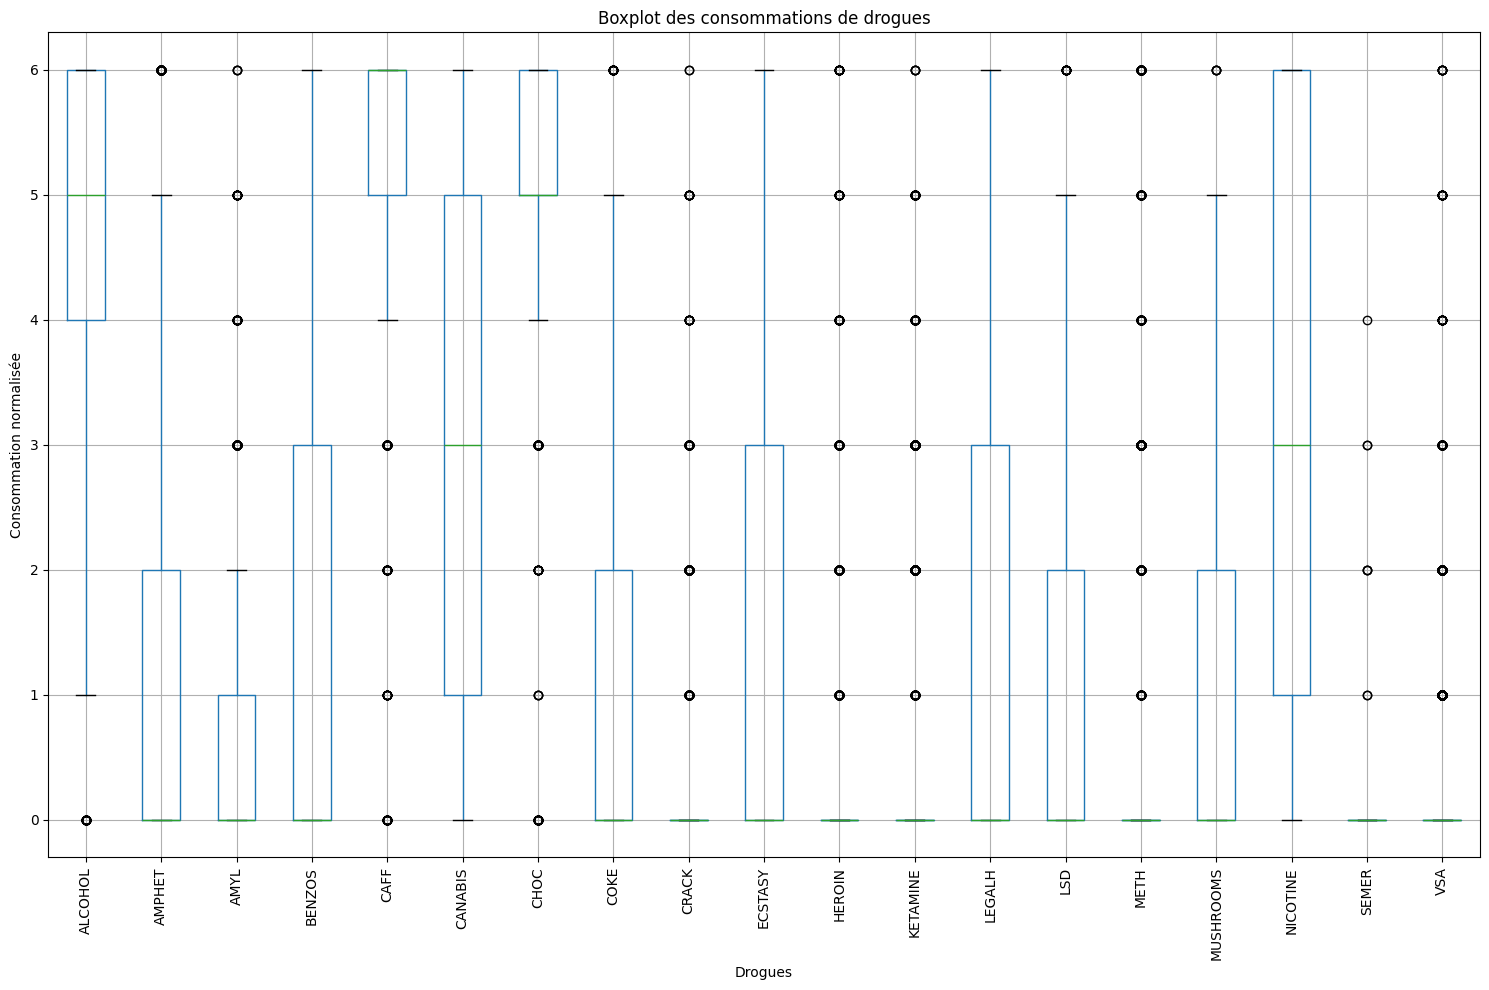

In [2]:
import numpy as np
columns = df.columns

# Mapping des classes de consommation à des valeurs continues (on transforme les données discrètes en continues)
consumption_map = {
    "CL0": 0, "CL1": 1, "CL2": 2, "CL3": 3, "CL4": 4, "CL5": 5, "CL6": 6
}
drug_columns = columns[13:]  # de ALCOHOL à VSA

NORMALIZE = False  # Flag pour normaliser les données (on normalise si on veut comparer les coéfficients entre drogues)

# Convertir les colonnes de consommation
for col in drug_columns:
    df[col] = df[col].map(consumption_map)
    if NORMALIZE:
        df[col] = df[col] - np.mean(df[col])  # Centrer les données
        df[col] = df[col]/ np.std(df[col])  # Normaliser les données

# Convertir les colonnes numériques en float
for col in columns[1:13]:
    df[col] = pd.to_numeric(df[col], errors='coerce') #(coerce pour éviter les erreurs de conversion, ça mettra NaN si la conversion échoue)


plt.figure(figsize=(15, 10))
df[drug_columns].boxplot(rot=90)
plt.title('Boxplot des consommations de drogues')
plt.xlabel('Drogues')
plt.ylabel('Consommation normalisée')
plt.tight_layout()
# On vas pas l'utiliser car les données sont en 7 catégories, donc le boxplot n'est pas pertinent


# Vérification rapide après transformation
df[drug_columns].describe() # on affiche le nombre de valeurs, la moyenne, l'écart-type, les min, max et les quartiles

# boxplot des drogues


Liste des drogues : ['ALCOHOL', 'AMPHET', 'AMYL', 'BENZOS', 'CAFF', 'CANABIS', 'CHOC', 'COKE', 'CRACK', 'ECSTASY', 'HEROIN', 'KETAMINE', 'LEGALH', 'LSD', 'METH', 'MUSHROOMS', 'NICOTINE', 'SEMER', 'VSA']


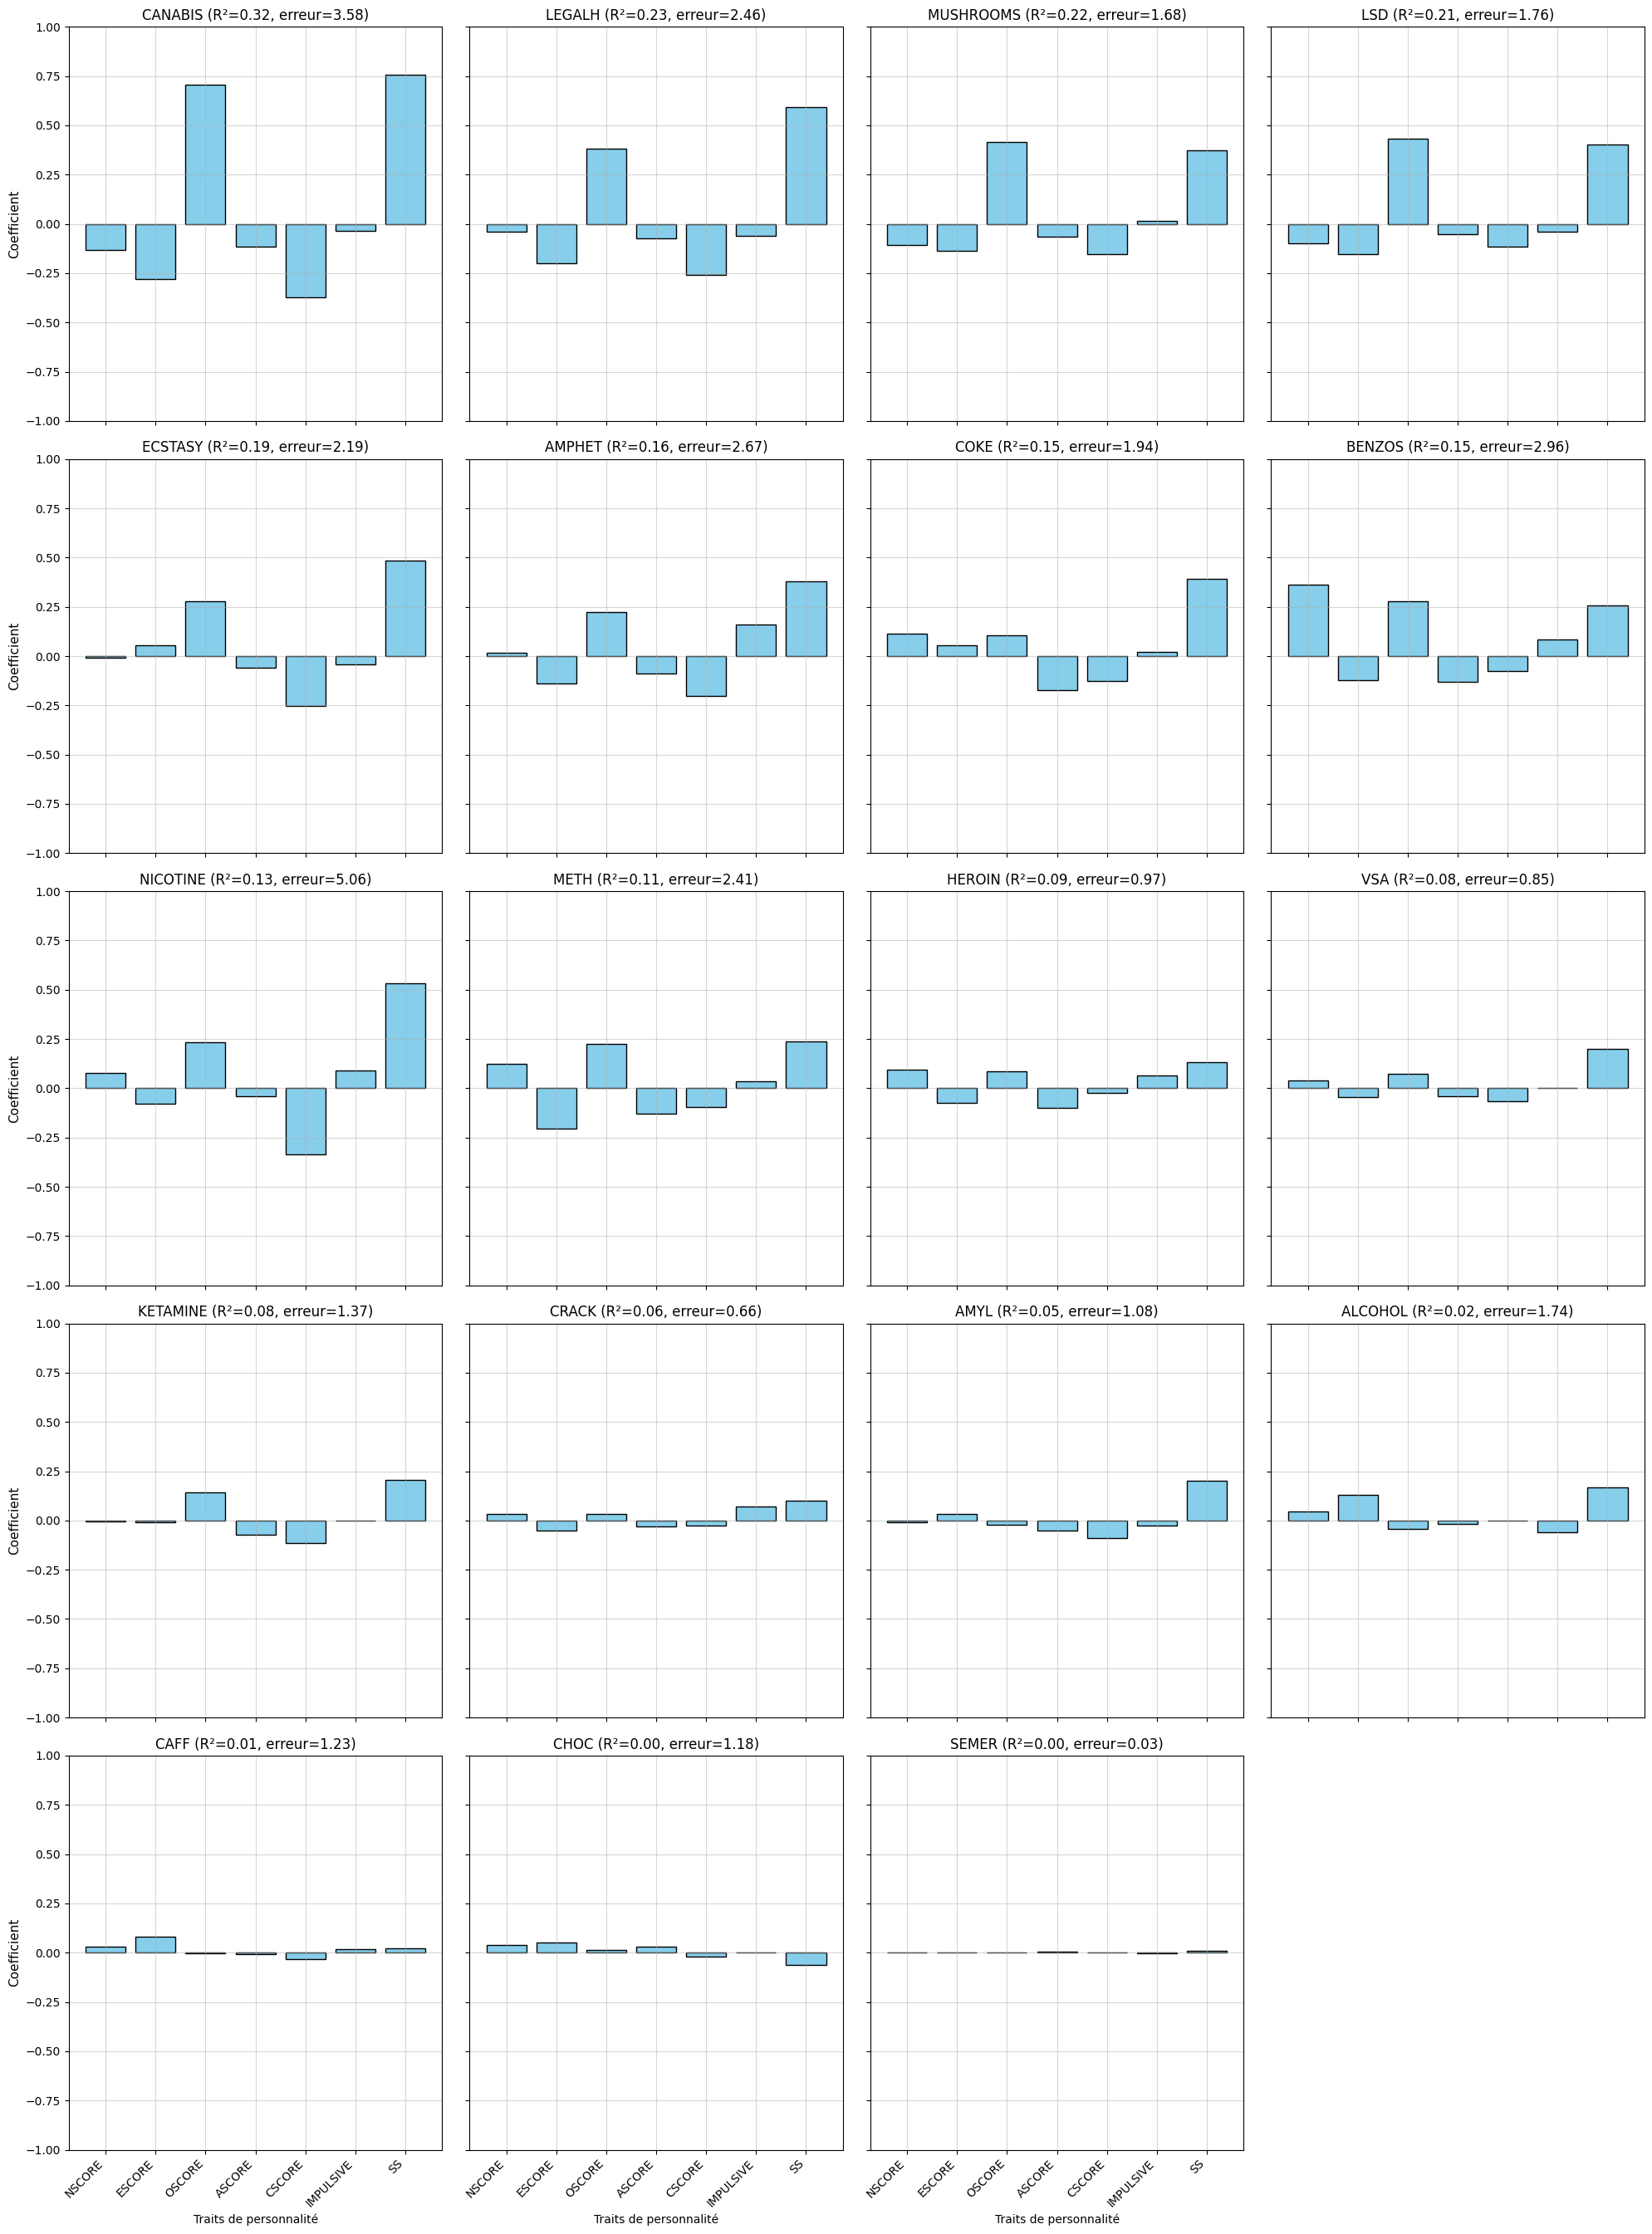

In [3]:
def regression(y_column:str,X_columns:list):

    # On met en valeur à retrouver la consommation de la drogue y_column
    y = df[y_column]

    # Indépendantes : traits de personnalité
    X = df[X_columns]

    # On ajoute une constante pour le biais
    x_transform = np.hstack([X, np.ones((X.shape[0], 1))])

    # On a les coefficients de la régression linéaire
    # On utilise la méthode des moindres carrés
    a = np.linalg.solve(x_transform.T@x_transform, x_transform.T@y)

    # Prédictions
    y_pred = x_transform @ a

    # Erreur quadratique moyenne
    mse = np.mean((y - y_pred) ** 2)

    # R²
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    ss_res = np.sum((y - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    return r_squared, mse, pd.Series(a[:-1], index=X_columns)

DRUGS = df.columns[13:]
print("Liste des drogues :", DRUGS.tolist())

resultat = []

# On effectue la régression pour chaque drogue
for drug in DRUGS:
    R2, error, coeffs = regression(drug,["NSCORE", "ESCORE", "OSCORE", "ASCORE", "CSCORE", "IMPULSIVE", "SS"])
    resultat.append([drug,R2,error,coeffs])

# Tri des résultats par R²
sorted_resultat = sorted(resultat, key=lambda x:x[1], reverse=True)

nb_drogues = len(sorted_resultat)

fig, axs = plt.subplots(nb_drogues//4 +1, 4, figsize=(20, 27))

# Affichage des résultats
for i,elt in enumerate(sorted_resultat):
    ax = axs[i // 4, i % 4]
    ax.bar(elt[3].index, elt[3].values, color='skyblue', edgecolor='black')
    ax.set_xticks(elt[3].index)
    ax.set_xticklabels(elt[3].index, rotation=45, ha='right', fontsize=10)
    ax.set_title(f"{elt[0]} (R²={elt[1]:.2f}, erreur={elt[2]:.2f})")
    ax.set_xlabel('Traits de personnalité')
    ax.set_ylabel('Coefficient', fontsize=11)
    ax.set_ylim(-1, 1)
    ax.grid(True, alpha=0.5)

for i,ax in enumerate(axs.flat):
    if i >= len(sorted_resultat):
        ax.set_visible(False)  # Masquer les axes inutilisés
    else:
        ax.label_outer()  # Ne pas afficher les labels des axes intérieurs

plt.tight_layout()
plt.savefig('./image_matplotlib/regression_results.png', dpi=300)



<BarContainer object of 5 artists>

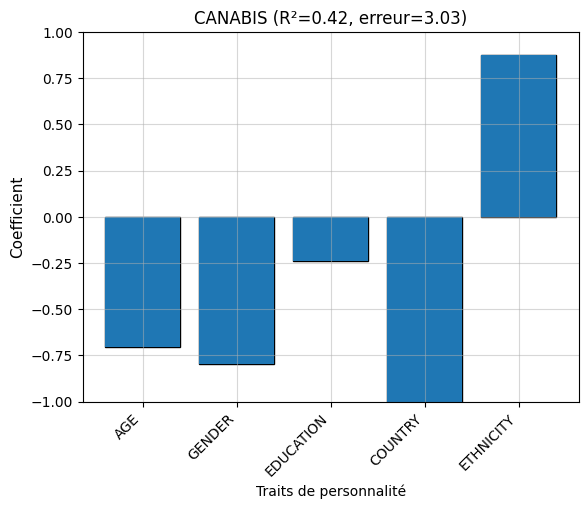

In [11]:

current_drug = "CANABIS"
analized_column = ["AGE","GENDER","EDUCATION","COUNTRY","ETHNICITY"]
r2,msre,coeffs = regression(current_drug,analized_column)
plt.bar(coeffs.index, coeffs.values, color='skyblue', edgecolor='black')
plt.xticks(coeffs.index)
plt.xticks(coeffs.index, rotation=45, ha='right', fontsize=10)
plt.title(f"{current_drug} (R²={r2:.2f}, erreur={msre:.2f})")
plt.xlabel('Traits de personnalité')
plt.ylabel('Coefficient', fontsize=11)
plt.ylim(-1, 1)
plt.grid(True, alpha=0.5)
plt.bar(coeffs.index, coeffs.values)

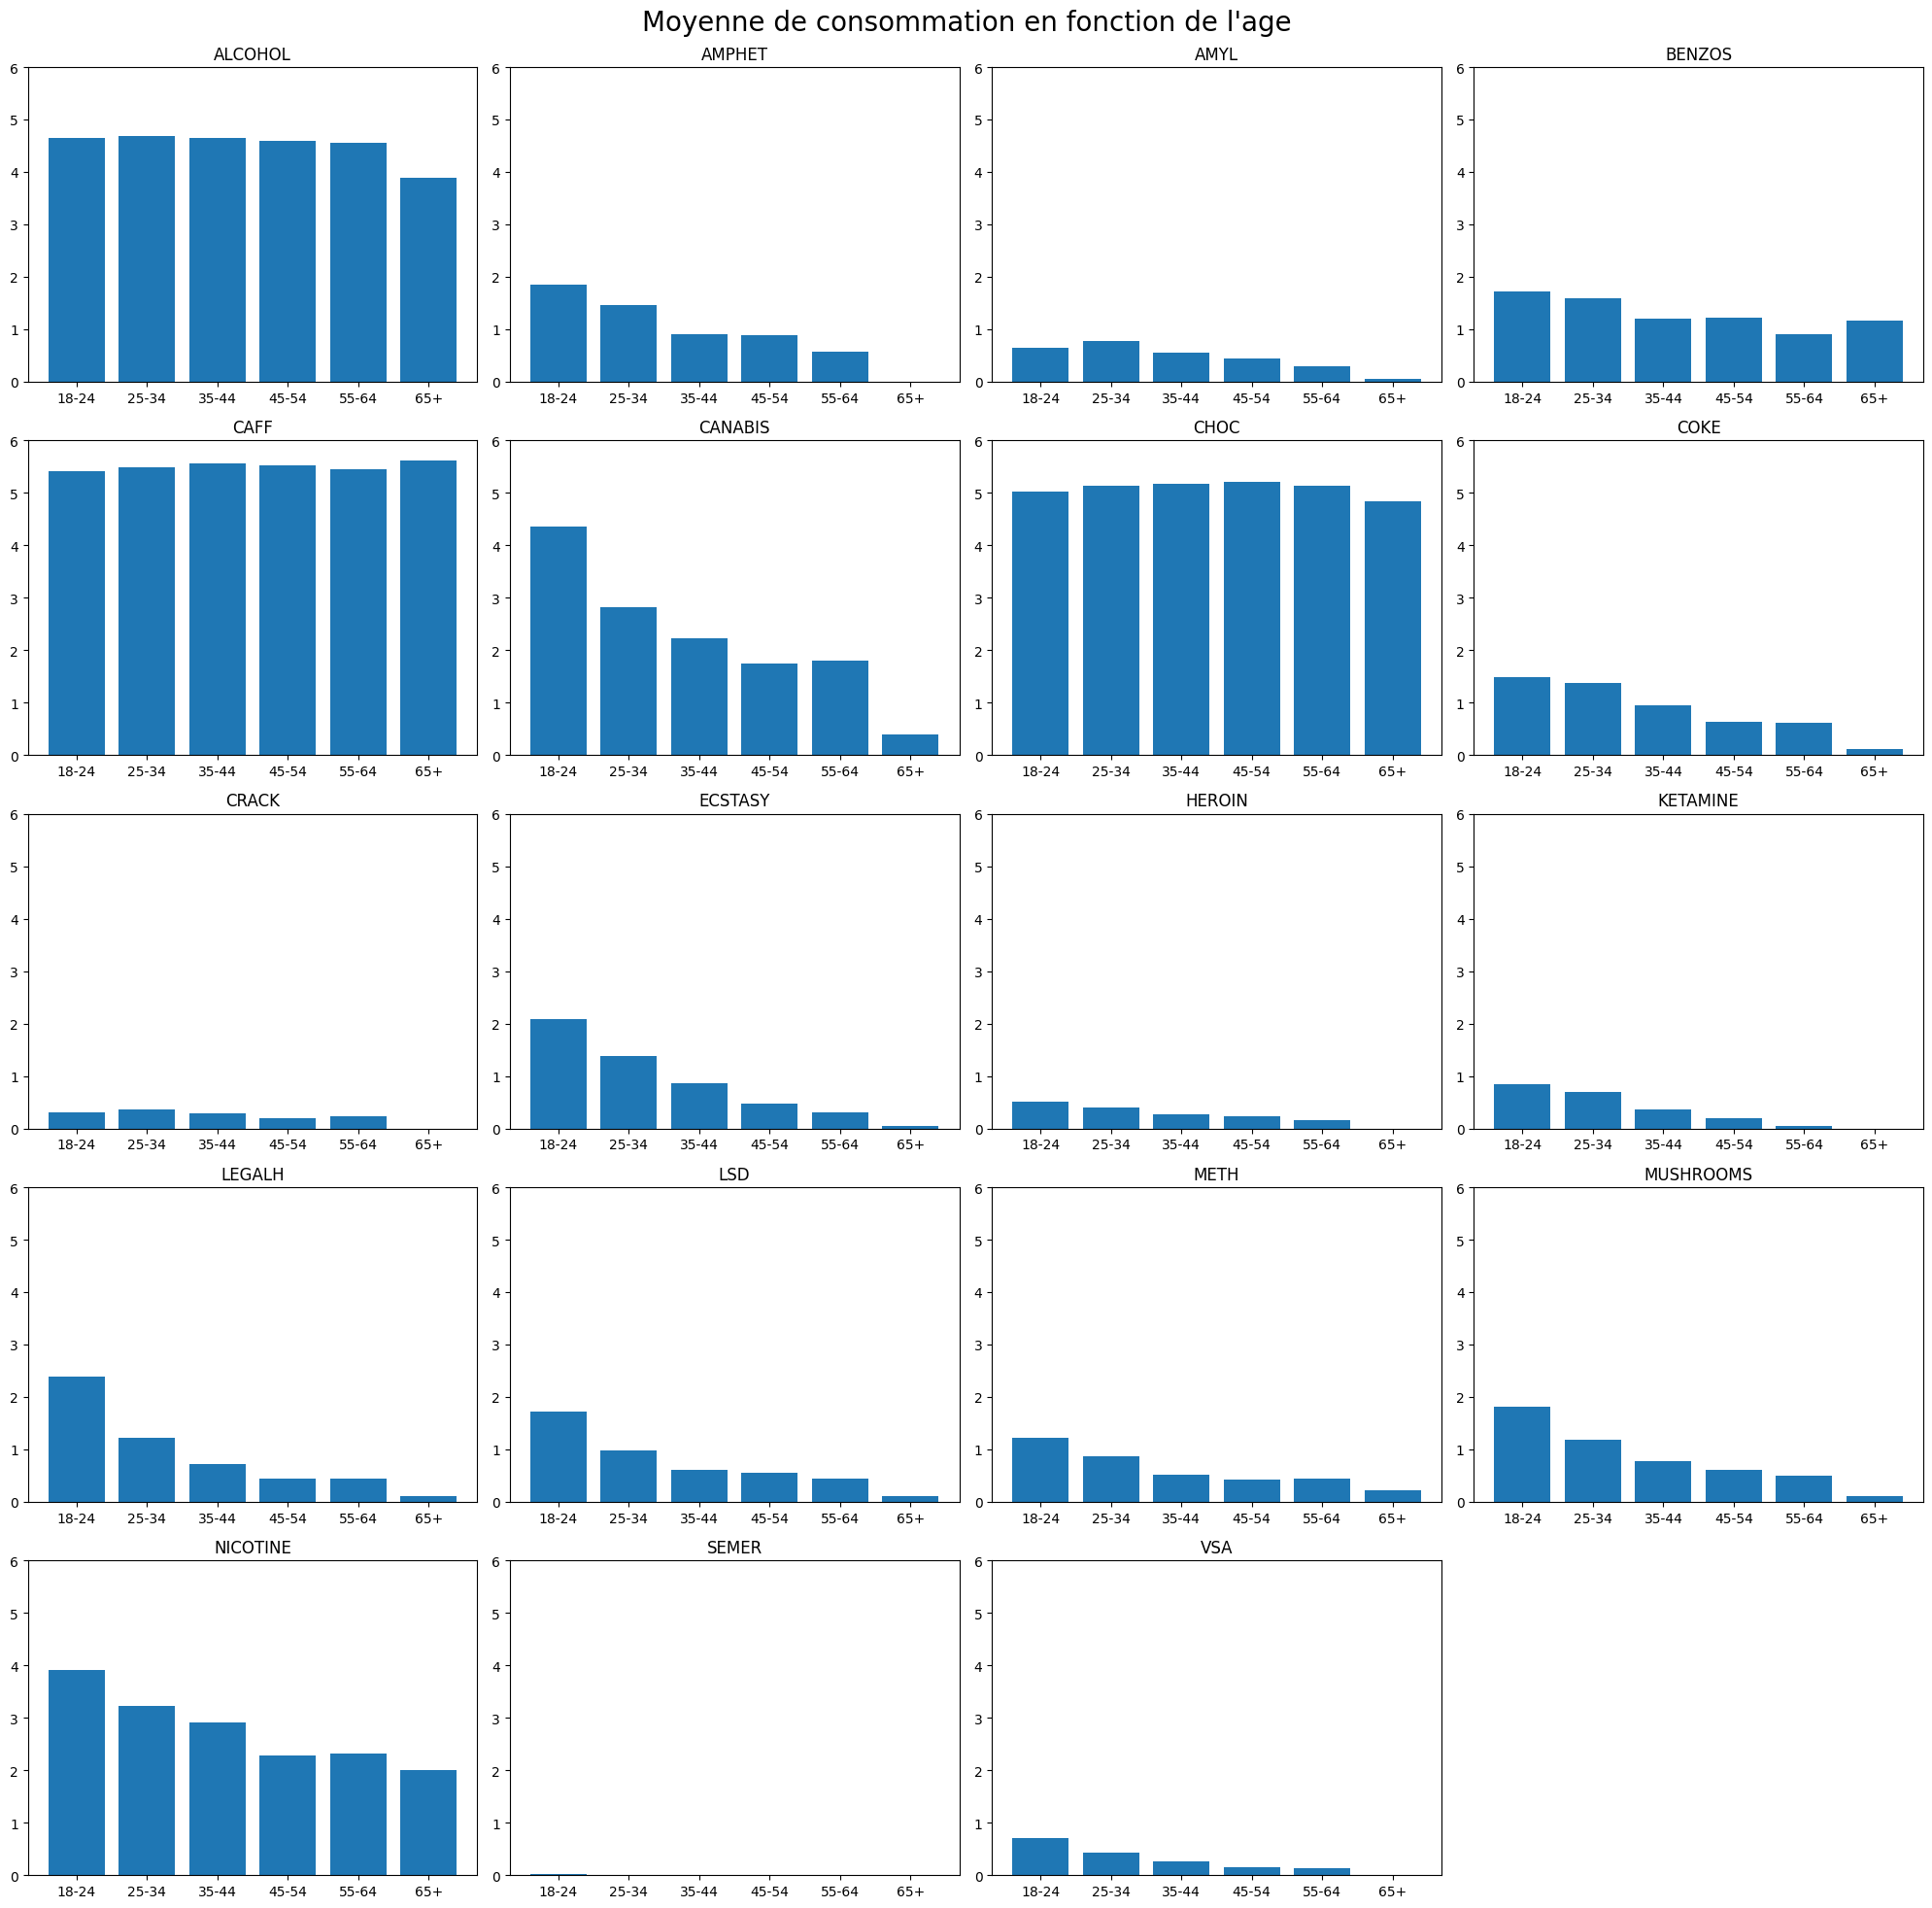

In [ ]:
DRUGS
X = df.to_numpy()

ages = np.unique(X[:,1])

cols = 4
fig, axs = plt.subplots(len(DRUGS) // cols + 1,cols, figsize=(20,20))
for i, ax in enumerate(axs.flatten()):
    if i < len(DRUGS):
        resultat = []
        for age in ages:
            resultat.append(np.mean(X[np.where(X[:,1] == age)][:,13+i]))
        ax.bar(["18-24","25-34","35-44","45-54","55-64","65+"], resultat)
        ax.set_title(DRUGS[i])
        ax.set_ylim([0,6])
    else:
        ax.set_visible(False)
fig.suptitle("Moyenne de consommation en fonction de l'age", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.savefig('./image_matplotlib/moyenne_conso_age.png', dpi=300)